# Figure 1 - Contribution of uncertainties in climate projections

This notebook includes the code to calculate the contribution of four sources of uncertainty in climate projections (i.e., model uncertainty, scenario uncertainty, internal variability unceratinty and volcanic uncertainty), and the code to reproduce Figure 1.

---------------

Written by May Chim

Last updated: 31 July 2024

---------------

## Import python packages

In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import os
import matplotlib.ticker as ticker
import matplotlib.patches as patches

In [2]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['legend.edgecolor']='black'
plt.rcParams['axes.linewidth']='0.8'
plt.rcParams['xtick.bottom']= 'True'
plt.rcParams['ytick.left']= 'True'
plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'
plt.rcParams['xtick.major.size']='3.5'
plt.rcParams['ytick.major.size']='3.5'
plt.rcParams['xtick.major.width']='0.8'
plt.rcParams['ytick.major.width']='0.8'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

plt.rc('font', size=16) # controls default text sizes          
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title

## Read data

In [3]:
# Read in FaIR simulation results

# Directory of data files
os.chdir('<path-to-directory-of-data>')

# Future projection with 1000-member stochastic volcanic forcing scenarios
df1 = xr.open_dataset('stochastic_volcanoes.nc')

# Future projection with 1000-member stochastic volcanic forcing scenarios and internal variability
df2 = xr.open_dataset('stochastic_volcanoes_stochastic_climate.nc')

# Future projection with constant volcanic forcing (CMIP6 ScenarioMIP)
dn = xr.open_dataset('no_future_volcanoes.nc')

## Scenario uncertainty

Dataset used: 

dn = no_volcanoes_future.nc (i.e., no stochastic volcanic forcing and no internal variability)

In [4]:
def calc_scenario_uncertainty(df):
    
    # Function to calculate the mean, median, 1st, 5th, 95th and 99th percentile of scenario uncertainty
    # Scenario unceratinty is taken along the 'scenario' dimension (across three SSP scenarios)
    #    and the 'config' dimension (along the 1000 FaIR ensemble members).
    # A 10-year moving mean is applied
    
    mean = df.mean(dim=['scenario','config']).rolling(timebounds=10, center=True).mean()
    median = df.median(dim=['scenario','config']).rolling(timebounds=10, center=True).mean()
    percen1 = df.quantile(0.01, dim=['scenario','config']).rolling(timebounds=10, center=True).mean()
    percen5 = df.quantile(0.05, dim=['scenario','config']).rolling(timebounds=10, center=True).mean()
    percen95 = df.quantile(0.95, dim=['scenario','config']).rolling(timebounds=10, center=True).mean()
    percen99 = df.quantile(0.99, dim=['scenario','config']).rolling(timebounds=10, center=True).mean()

    return mean, median, percen1, percen5, percen95, percen99


scenario_uncertainty = dn.temperature[160:,:,:] # slice time from 2010, for 10-year moving mean
mean_scenario, median_scenario, percen1_scenario, \
percen5_scenario, percen95_scenario, percen99_scenario = calc_scenario_uncertainty(scenario_uncertainty)


## Model uncertainty

Dataset used: 

dn = no_volcanoes_future.nc (i.e., no internal variability, no stochastic forcing)

In [5]:
# Calculate model uncertainty in future projections

def calc_model_uncertainty(df):
    
    # Function to calculate mean, median, 1st, 5th, 95th and 99th percentile of model uncertainty
    # Take mean along 'config' (1000 FaIR ensemble members)
    # A 10-year moving mean is applied
    
    mean = df.mean(dim='config').rolling(timebounds=10, center=True).mean()
    median = df.median(dim='config').rolling(timebounds=10, center=True).mean()
    percen99 = df.quantile(0.99,dim='config').rolling(timebounds=10, center=True).mean()
    percen1 = df.quantile(0.01,dim='config').rolling(timebounds=10, center=True).mean()
    percen5 = df.quantile(0.05, dim='config').rolling(timebounds=10, center=True).mean()
    percen95 = df.quantile(0.95, dim='config').rolling(timebounds=10, center=True).mean()

    return mean, median, percen1, percen5, percen95, percen99

future_ssp245 = dn.temperature[160:,1,:]
mean_future_ssp245, median_future_ssp245, percen1_future_ssp245, \
percen5_future_ssp245, percen95_future_ssp245, percen99_future_ssp245 = calc_model_uncertainty(future_ssp245)

## Internal variability uncertainty

Datasets used: 

df2 = stochastic_volcanoes_stochastic_climate.nc (with internal variability and stochastic forcing)

df1 = stochastic_volcanoes.nc (without internal variability and with stochastic forcing)

In [6]:
def calc_internal_var_uncertainty(df):
    
    # Function to calculate mean, median, 1st, 5th, 95th and 99th percentile of 
    # internal variability uncertainty
    # Take mean along 'config' (1000 FaIR ensemble members)
    # A 10-year moving mean is applied
    
    mean = df.mean(dim='config').rolling(timebounds=10, center=True).mean()
    median = df.median(dim='config').rolling(timebounds=10, center=True).mean()
    percen99 = df.quantile(0.99,dim='config').rolling(timebounds=10, center=True).mean()
    percen1 = df.quantile(0.01,dim='config').rolling(timebounds=10, center=True).mean()
    percen5 = df.quantile(0.05, dim='config').rolling(timebounds=10, center=True).mean()
    percen95 = df.quantile(0.95, dim='config').rolling(timebounds=10, center=True).mean()

    return mean, median, percen1, percen5, percen95, percen99

# Take mean of the SSP scenarios
internal_var = (df2.temperature[160:,:,:] - df1.temperature[160:,:,:]).mean(dim='scenario')

mean_internal, median_internal, percen1_internal, \
percen5_internal, percen95_internal, percen99_internal = calc_internal_var_uncertainty(internal_var)

internal_var_ssp245 = df2.temperature[160:,1,:] - df1.temperature[160:,1,:]
mean_internal_ssp245, median_internal_ssp245, percen1_internal_ssp245, \
percen5_internal_ssp245, percen95_internal_ssp245, percen99_internal_ssp245 = calc_internal_var_uncertainty(internal_var_ssp245)


## Volcanic uncertainty

Datasets used:

df1 = stchastic_volcanoes.nc (with stochastic forcing and no internal variability)
 
dn = no_future_volcanoes.nc (no stochastic forcing and no internal variability)


In [7]:
def calc_volc_uncertainty(df):
    
    # Function to calculate mean, median, 1st, 5th, 95th and 99th percentile of volcanic uncertainty
    # Take mean along 'config' (1000 FaIR ensemble members)
    # A 10-year moving mean is applied
    
    mean = df.mean(dim='config').rolling(timebounds=10, center=True).mean()
    median = df.median(dim='config').rolling(timebounds=10, center=True).mean()
    percen99 = df.quantile(0.99,dim='config').rolling(timebounds=10, center=True).mean()
    percen1 = df.quantile(0.01,dim='config').rolling(timebounds=10, center=True).mean()
    percen5 = df.quantile(0.05, dim='config').rolling(timebounds=10, center=True).mean()
    percen95 = df.quantile(0.95, dim='config').rolling(timebounds=10, center=True).mean()

    return mean, median, percen1, percen5, percen95, percen99

volc = (df1.temperature[160:,:,:] - dn.temperature[160:,:,:]).mean(dim='scenario')

mean_volc, median_volc, percen1_volc, percen5_volc, \
percen95_volc, percen99_volc = calc_volc_uncertainty(volc)

volc_ssp245 = df1.temperature[160:,1,:] - dn.temperature[160:,1,:]

mean_volc_ssp245, median_volc_ssp245, percen1_volc_ssp245, \
percen5_volc_ssp245, percen95_volc_ssp245, percen99_volc_ssp245 = calc_volc_uncertainty(volc_ssp245)


## Historical and future mean


Dataset used: 

dn = no_volcanoes_future.nc (i.e., no internal variability, no stochastic forcing)

df2 = stochastic_volcanoes_stochastic_climate.nc (with internal variability and stochastic forcing)

In [8]:
# Calculate mean and median in the historical and future periods
# Take mean along 'config' (i.e., 1000 FaIR ensemble members)

# Annual mean GMST in the historical period
hist = dn.temperature[0:166,0,:]
mean_hist = hist.mean(dim='config')
median_hist = hist.median(dim='config')

# Annual mean GMST using the 1850-2014 volcanic forcing under SSP2-4.5
mean_1850_2014_forcing_ssp245 = dn.temperature[160:,1,:] 
ens_mean_1850_2014_forcing_ssp245 = mean_1850_2014_forcing_ssp245.mean(dim ='config') # ensemble mean

# Future mean projections (SSP2-4.5)
future_ssp245_projection = df2.temperature[160:,1,:]

mean_future_ssp245_proj, median_future_ssp245_proj, percen1_future_ssp245_proj, percen5_future_ssp245_proj, \
percen95_future_ssp245_proj, percen99_future_ssp245_proj = calc_model_uncertainty(future_ssp245_projection)


## Figure 1a

In [9]:
# Functions for plot

def plot_uncertainty(ax, data_lower, data_upper, labels, color, alpha=0.7):
    ax.fill_between(data_lower.timebounds, data_lower, data_upper, color=color, label=labels, alpha=alpha)

def plot_nearterm_boxplot(ax, scenario_mean, percen1, percen5, percen95, percen99, x, color):
    ax.fill_betweenx([scenario_mean[15:36].mean(), percen1[15:36].mean()], x, x+2, color=color, alpha=0.3)
    ax.fill_betweenx([scenario_mean[15:36].mean(), percen99[15:36].mean()], x, x+2, color=color, alpha=0.3)
    ax.fill_betweenx([scenario_mean[15:36].mean(), percen5[15:36].mean()], x, x+2, color=color, alpha=0.7)
    ax.fill_betweenx([scenario_mean[15:36].mean(), percen95[15:36].mean()], x, x+2, color=color, alpha=0.7)
    ax.scatter(x+1, scenario_mean[15:36].mean(), color='k', marker='o', s=20)

def plot_longterm_boxplot(ax, scenario_mean, percen1, percen5, percen95, percen99, x, color):
    ax.fill_betweenx([scenario_mean[65:86].mean(), percen1[65:86].mean()], x, x+2, color=color, alpha=0.3)
    ax.fill_betweenx([scenario_mean[65:86].mean(), percen99[65:86].mean()], x, x+2, color=color, alpha=0.3)
    ax.fill_betweenx([scenario_mean[65:86].mean(), percen5[65:86].mean()], x, x+2, color=color, alpha=0.7)
    ax.fill_betweenx([scenario_mean[65:86].mean(), percen95[65:86].mean()], x, x+2, color=color, alpha=0.7)
    ax.scatter(x+1, scenario_mean[65:86].mean(), color='k', marker='o', s=20)


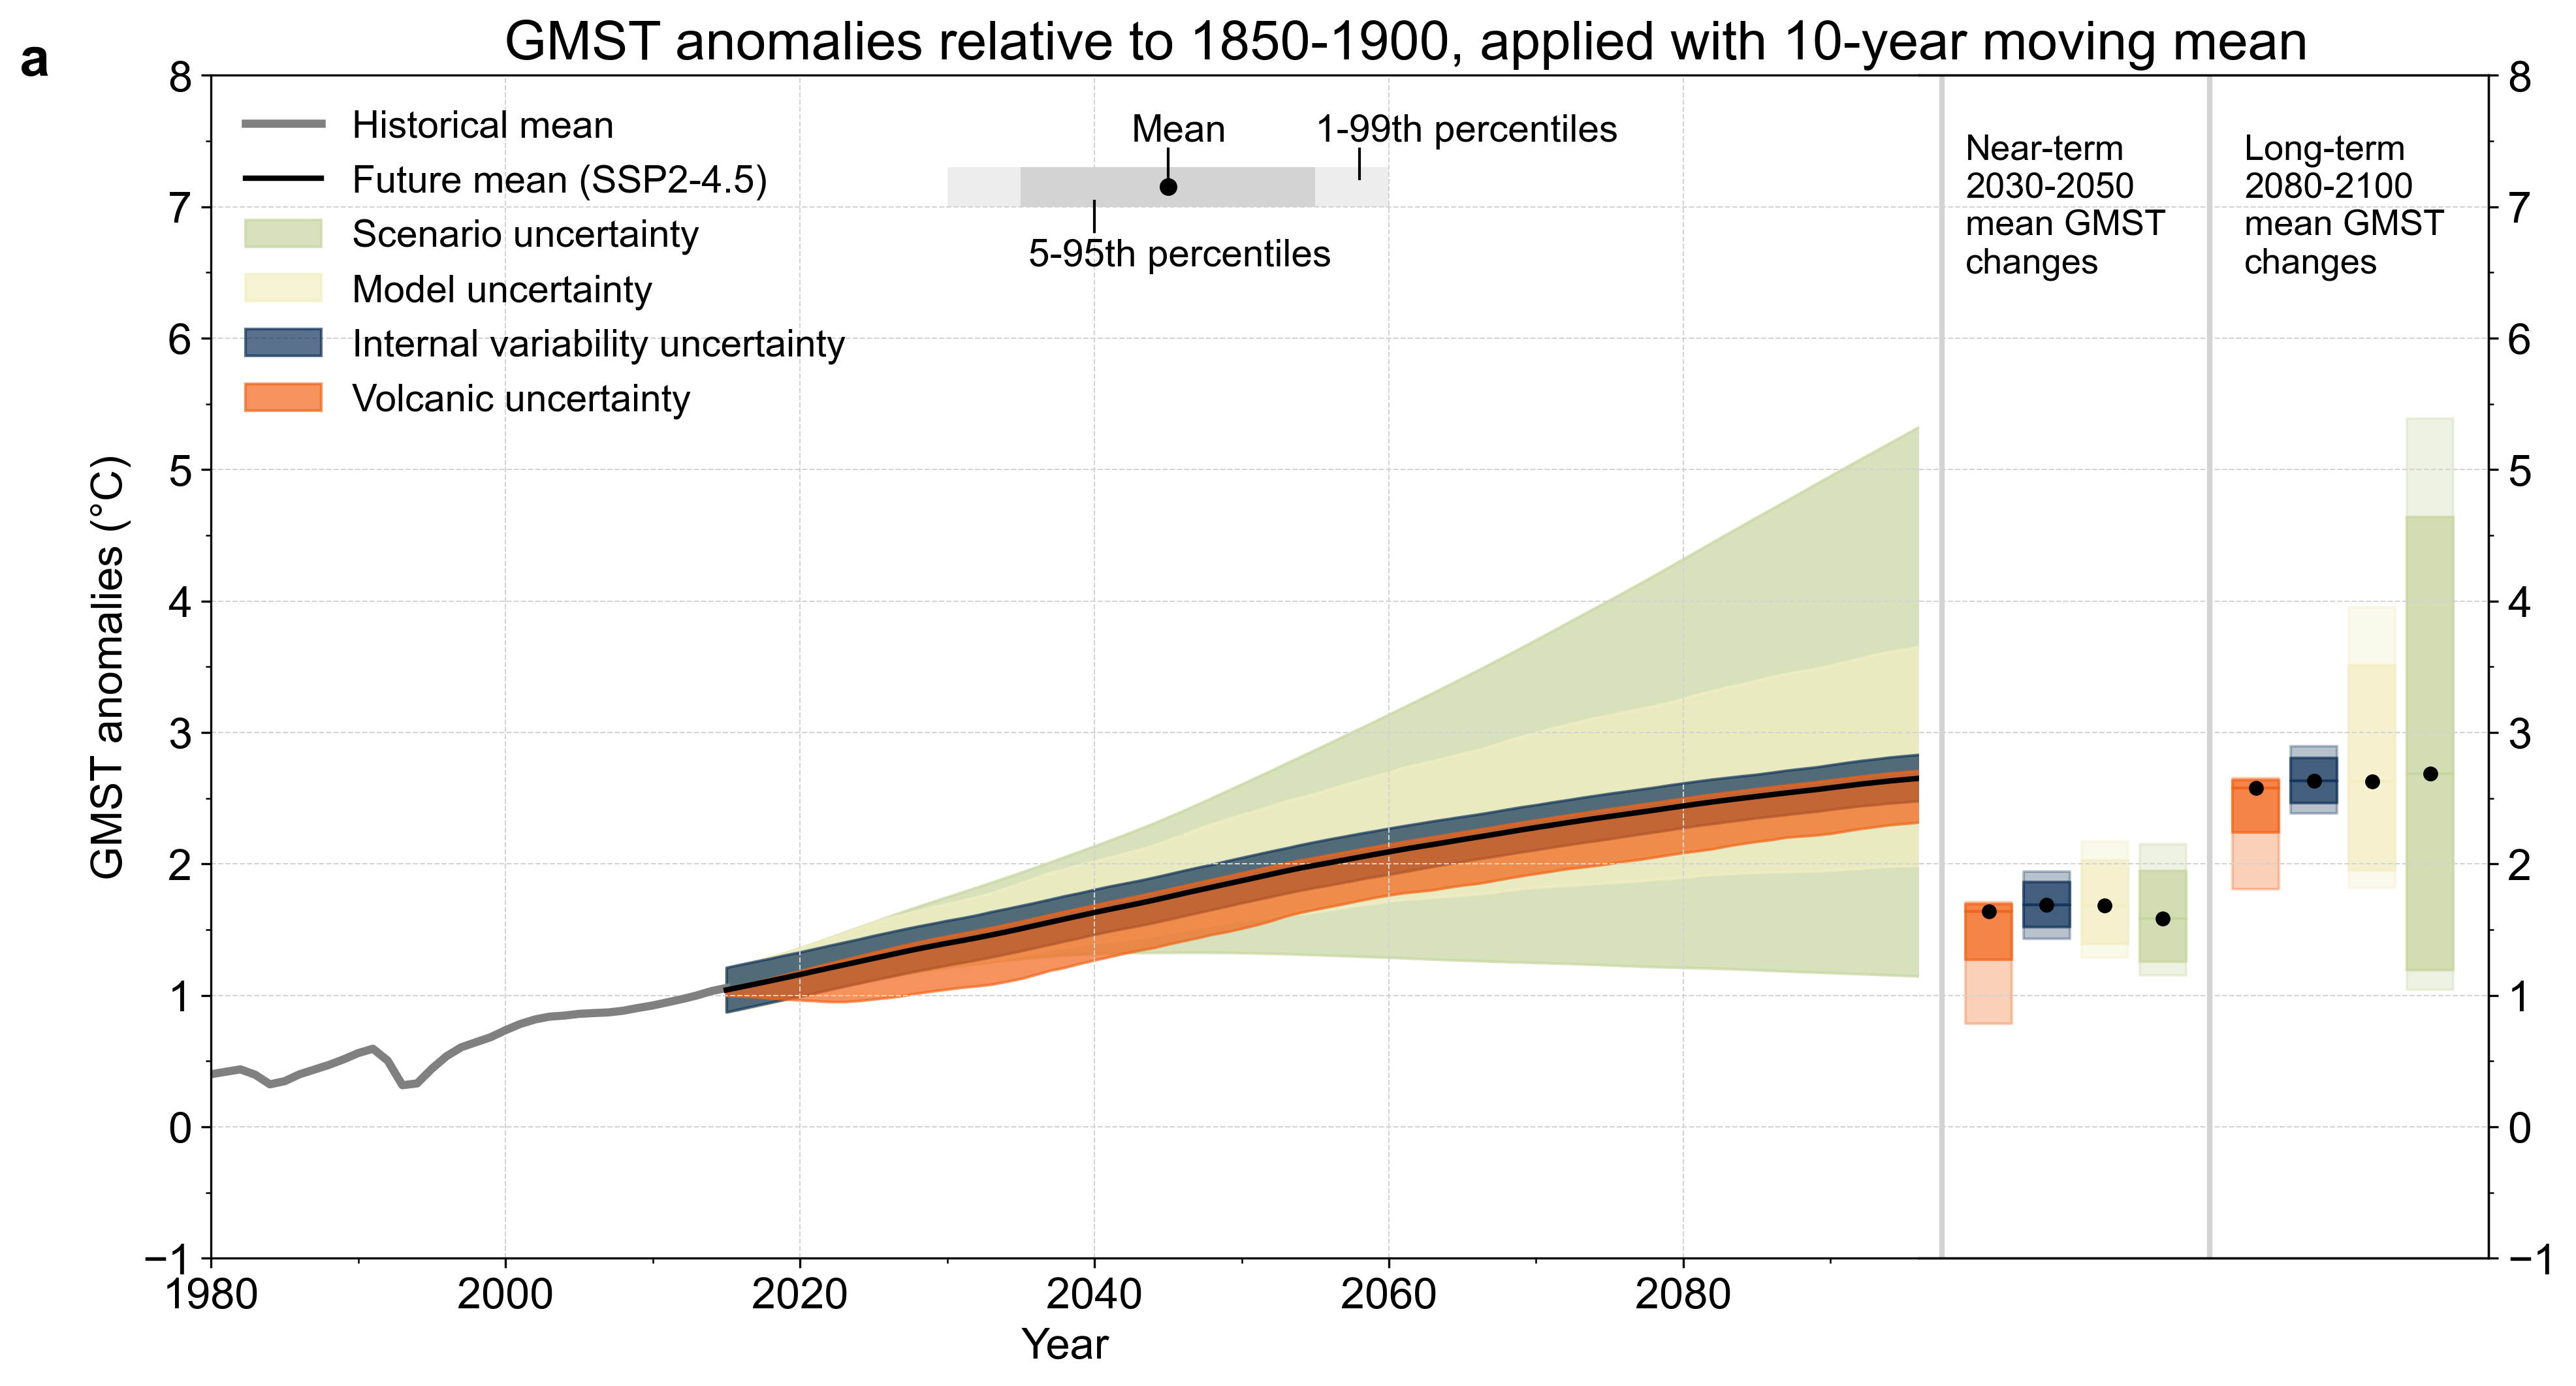

In [13]:
fig, (ax_main, ax_box) = plt.subplots(1, 2, figsize=(15, 8), gridspec_kw={'width_ratios': [3, 1]}, dpi=300)
plt.subplots_adjust(wspace=0)
ax_box.set_frame_on(True)
ax_twin = ax_box.twinx()

colors = {
    'scenario': '#C7D59F',
    'model': '#F3EEC3',
    'internal': '#12355B',
    'volcanic': '#F26419'
}
    
# Set ticks
ax_main.minorticks_on()
ax_twin.minorticks_on()
ax_main.spines[['right']].set_visible(False)
ax_box.spines[['left']].set_visible(False)
ax_twin.spines[['left']].set_visible(False)
ax_main.xaxis.set_minor_locator(ticker.MultipleLocator(10)) 
ax_main.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax_twin.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))

# Set grids
ax_main.grid(True, which='major', linestyle='--', linewidth=0.5, color ='lightgrey') 
ax_twin.grid(True, which='major', linestyle='--', linewidth=0.5, color ='lightgrey') 

# Figure label
ax_main.text(1967,8,'a', fontsize=20, fontweight='bold')

## Main plot

# Historical mean
ax_main.plot(mean_hist.timebounds, mean_hist, label='Historical mean', lw = 3, color = 'grey')

# Future mean (SSP2-4.5)
ax_main.plot(mean_scenario.timebounds, mean_future_ssp245_proj, lw = 2, color = 'k', 
         label = 'Future mean (SSP2-4.5)')

# Uncertainties
plot_uncertainty(ax_main, percen5_scenario, percen95_scenario, 'Scenario uncertainty', colors['scenario'])
plot_uncertainty(ax_main, percen5_future_ssp245, percen95_future_ssp245, 'Model uncertainty', colors['model'])
plot_uncertainty(ax_main, mean_future_ssp245_proj+percen5_internal, mean_future_ssp245_proj+percen95_internal, 
                 'Internal variability uncertainty', colors['internal'])
plot_uncertainty(ax_main, mean_future_ssp245_proj+percen5_volc, mean_future_ssp245_proj+percen95_volc, 
                 'Volcanic uncertainty', colors['volcanic'])

         
## Boxplots (2030-2050 mean GMST changes)

# Volcanic uncertainty
scenario_mean = mean_future_ssp245+mean_volc_ssp245
plot_nearterm_boxplot(ax_box, scenario_mean, scenario_mean+percen1_volc_ssp245, 
                      scenario_mean+percen5_volc_ssp245, scenario_mean+percen95_volc_ssp245, 
                      scenario_mean+percen99_volc_ssp245, 1, colors['volcanic'])

# Internal variability uncertainty
scenario_mean = mean_future_ssp245+mean_internal_ssp245
plot_nearterm_boxplot(ax_box, scenario_mean, scenario_mean+percen1_internal_ssp245, 
                      scenario_mean+percen5_internal_ssp245, scenario_mean+percen95_internal_ssp245, 
                      scenario_mean+percen99_internal_ssp245, 3.5, colors['internal'])

# Model uncertainty
plot_nearterm_boxplot(ax_box, mean_future_ssp245, percen1_future_ssp245, percen5_future_ssp245,
              percen95_future_ssp245, percen99_future_ssp245, 6, colors['model'])

# Scenario uncertainty
plot_nearterm_boxplot(ax_box, mean_scenario, percen1_scenario, percen5_scenario,
              percen95_scenario, percen99_scenario, 8.5, colors['scenario'])

# Boxplots (2080-2100 mean GMST changes)

# Volcanic uncertainty
scenario_mean = mean_future_ssp245+mean_volc_ssp245
plot_longterm_boxplot(ax_box, scenario_mean, scenario_mean+percen1_volc_ssp245, 
                      scenario_mean+percen5_volc_ssp245, scenario_mean+percen95_volc_ssp245, 
                      scenario_mean+percen99_volc_ssp245, 12.5, colors['volcanic'])

# Internal variability uncertainty
scenario_mean = mean_future_ssp245+mean_internal_ssp245
plot_longterm_boxplot(ax_box, mean_future_ssp245+mean_internal_ssp245, scenario_mean+percen1_internal_ssp245, 
                      scenario_mean+percen5_internal_ssp245, scenario_mean+percen95_internal_ssp245, 
                      scenario_mean+percen99_internal_ssp245, 15, colors['internal'])

# Model uncertainty
plot_longterm_boxplot(ax_box, mean_future_ssp245, percen1_future_ssp245, percen5_future_ssp245,
              percen95_future_ssp245, percen99_future_ssp245, 17.5, colors['model'])

# Scenario uncertainty
plot_longterm_boxplot(ax_box, mean_scenario, percen1_scenario, percen5_scenario,
              percen95_scenario, percen99_scenario, 20, colors['scenario'])

# Set text
ax_box.text(13,6.5, 'Long-term\n2080-2100\nmean GMST\nchanges', fontsize = 13)
ax_box.text(1,6.5, 'Near-term\n2030-2050\nmean GMST\nchanges', fontsize = 13)

# Set boundaries
ax_box.axvline(x = 0, color = 'lightgrey', lw = 2)
ax_box.axvline(x = 11.5, color = 'lightgrey', lw = 2)

# Figure adjustments
ax_box.set_xticks([])
ax_box.set_yticks([])
ax_box.set_ylim(-1,8)
ax_twin.set_ylim(-1,8)
ax_box.set_xlim(-1,20+3.5)

# Figure adjustments
ax_main.set_xlabel('Year')
ax_main.set_ylabel('GMST anomalies (°C)')
ax_main.set_xlim(1980,2096)
ax_main.set_ylim(-1,8)
ax_main.set_title('GMST anomalies relative to 1850-1900, applied with 10-year moving mean', 
                  x=0.7, fontsize = 20)
ax_main.legend(fontsize = 14, loc = 'upper left', frameon=False)

# Set boxplot legend
a_loc = 7
b_loc = 2030
ax_main.add_patch(patches.Rectangle((b_loc, a_loc),30,0.3,facecolor='lightgrey', alpha = 0.4)) 
ax_main.add_patch(patches.Rectangle((b_loc+5, a_loc),20,0.3,facecolor='lightgrey')) 
ax_main.scatter(b_loc+15, a_loc+0.3/2, s = 30, color='k')
ax_main.vlines(x=b_loc+10, ymin=a_loc-0.2, ymax=a_loc+0.05, colors='k', lw=1)
ax_main.vlines(x=b_loc+28, ymin=a_loc+0.2, ymax=a_loc+0.45, colors='k', lw=1)
ax_main.vlines(x=b_loc+15, ymin=a_loc+0.2, ymax=a_loc+0.45, colors='k', lw=1)
ax_main.text(b_loc+12.5, a_loc+0.5, 'Mean', color='k', fontsize = 14)
ax_main.text(b_loc+25, a_loc+0.5, '1-99th percentiles', color='k', fontsize = 14)
ax_main.text(b_loc+5.5, a_loc-0.45, '5-95th percentiles', color='k', fontsize = 14)

plt.savefig('Figure1a.pdf', format = 'pdf')

## Plot : Figure 1b

In [11]:
def calc_annual_uncertainty(df):
    mean = df.mean(dim=['config'])    
    median = df.median(dim=['config'])
    percen99 = df.quantile(0.99, dim='config')
    percen1 = df.quantile(0.01, dim='config')
    percen5 = df.quantile(0.05, dim=['config'])
    percen95 = df.quantile(0.95, dim=['config'])

    return mean, median, percen1, percen5, percen95, percen99

# Scenario uncertainty
future_ssp119 = dn.temperature[165:,0,:]
future_ssp245 = dn.temperature[165:,1,:]
future_ssp585 = dn.temperature[165:,2,:]

mean_future_ssp119, median_future_ssp119, percen1_future_ssp119, \
percen5_future_ssp119, percen95_future_ssp119, percen99_future_ssp119 = calc_annual_uncertainty(future_ssp119)

mean_future_ssp245, median_future_ssp245, percen1_future_ssp245, \
percen5_future_ssp245, percen95_future_ssp245, percen99_future_ssp245 = calc_annual_uncertainty(future_ssp245)

mean_future_ssp585, median_future_ssp585, percen1_future_ssp585, \
percen5_future_ssp585, percen95_future_ssp585, percen99_future_ssp585 = calc_annual_uncertainty(future_ssp585)

# Internal variability
internal_var_ssp245 = df2.temperature[165:,1,:] - df1.temperature[165:,1,:]
mean_internal_ssp245, median_internal_ssp245, percen1_internal_ssp245, \
percen5_internal_ssp245, percen95_internal_ssp245, percen99_internal_ssp245 = calc_annual_uncertainty(internal_var_ssp245)

# Volcanic uncertainty
volc_ssp245 = df1.temperature[165:,1,:] - dn.temperature[165:,1,:]
mean_volc_ssp245, median_volc_ssp245, percen1_volc_ssp245, percen5_volc_ssp245, \
percen95_volc_ssp245, percen99_volc_ssp245 = calc_annual_uncertainty(volc_ssp245)


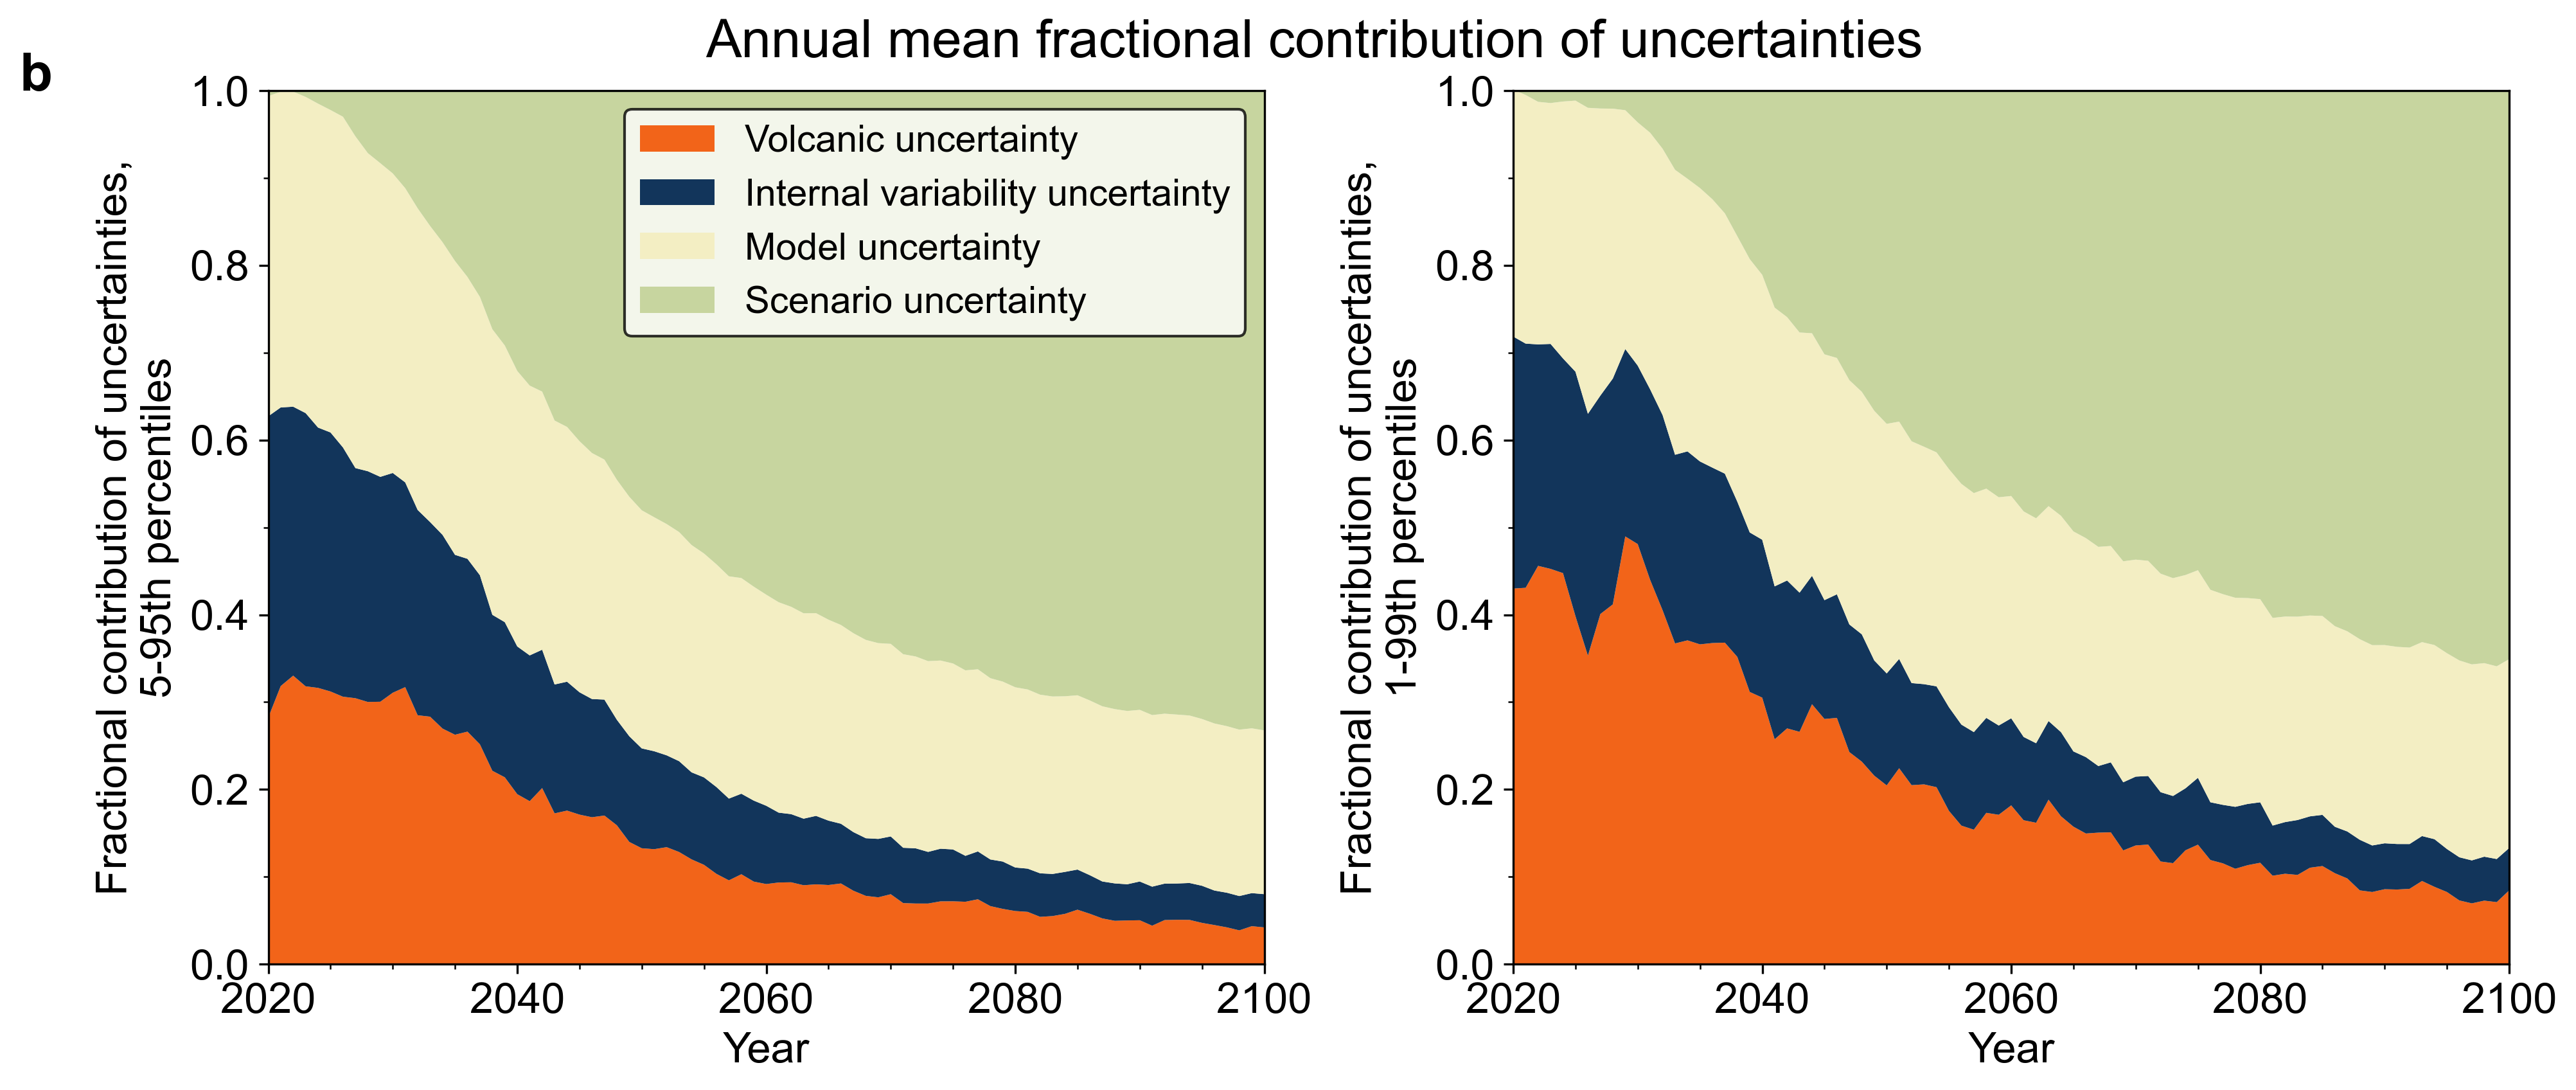

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 1]}, dpi=300)

plt.subplots_adjust(wspace=0.25)

ax1.minorticks_on()
ax2.minorticks_on()
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(5)) 
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.1)) 


# Fraction contribution of uncertainties (5-95 percentile)
volc_tot = (percen95_volc_ssp245 - percen5_volc_ssp245)
internal_tot = (percen95_internal_ssp245 - percen5_internal_ssp245)
model_tot = percen95_future_ssp245-percen5_future_ssp245
scenario_tot = (percen95_future_ssp585-percen95_future_ssp119) + (percen5_future_ssp585-percen5_future_ssp119)
tot = volc_tot+internal_tot+model_tot+scenario_tot

frac_volc = volc_tot / tot
frac_internal = internal_tot / tot
frac_model = model_tot / tot
frac_scenario = scenario_tot / tot

ax1.stackplot(volc_tot.timebounds, frac_volc, frac_internal, frac_model, frac_scenario, 
              labels=['Volcanic uncertainty', 'Internal variability uncertainty', 'Model uncertainty', 
                      'Scenario uncertainty'],
              colors=['#F26419','#12355B', '#F3EEC3', '#C7D59F'])

ax1.legend(frameon=True, fontsize = 14)

ax1.text(2000,1,'b', fontsize=20, fontweight='bold')

ax1.set_xlim(2020,2100)
ax1.set_ylim(0,1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Fractional contribution of uncertainties,\n5-95th percentiles')

ax1.set_title('Annual mean fractional contribution of uncertainties', y = 1.02, x = 1.05, fontsize = 20)

###################################

# Fractional contribution (1-99 percentile)
volc_tot = (percen99_volc_ssp245 - percen1_volc_ssp245)
internal_tot = (percen99_internal_ssp245 - percen1_internal_ssp245)
model_tot = (percen99_future_ssp245 - percen1_future_ssp245)
scenario_tot = (percen99_future_ssp585-percen99_future_ssp119)+(percen1_future_ssp585-percen1_future_ssp119)
tot = volc_tot+internal_tot+model_tot+scenario_tot

frac_volc = volc_tot / tot
frac_internal = internal_tot / tot
frac_model = model_tot / tot
frac_scenario = scenario_tot / tot

ax2.stackplot(volc_tot.timebounds, frac_volc, frac_internal, frac_model, frac_scenario, 
              labels=['Volcanic uncertainty', 'Internal variability uncertainty', 
                      'Model uncertainty', 'Scenario uncertainty'],
              colors=['#F26419','#12355B', '#F3EEC3', '#C7D59F'])

ax2.set_ylabel('Fractional contribution of uncertainties,\n1-99th percentiles')

ax2.set_xlim(2020,2100)
ax2.set_ylim(0,1)
ax2.set_xlabel('Year')

fig.savefig('Figure1b.pdf', format = 'pdf')